Ashna'a code for BERT starts here 

Installing ktrain as the main dependency


In [3]:
!pip3 install ktrain

     |████████████████████████████████| 25.3MB 1.4MB/s 
     |████████████████████████████████| 6.8MB 47.8MB/s 
     |████████████████████████████████| 983kB 40.0MB/s 
     |████████████████████████████████| 266kB 47.5MB/s 
     |████████████████████████████████| 1.3MB 42.3MB/s 
     |████████████████████████████████| 1.2MB 45.0MB/s 
     |████████████████████████████████| 471kB 45.7MB/s 
     |████████████████████████████████| 2.9MB 36.2MB/s 
  Created wheel for ktrain: filename=ktrain-0.25.4-cp36-none-any.whl size=25276443 sha256=31643dd0947fac0dd2510afa3c706d5a2fb53527cfe0d10613d57ab3fca17880
  Stored in directory: /root/.cache/pip/wheels/1b/77/8a/bdceaabc308e7178d575278bf6143b7d1a9b939a1e40c56b88
  Created wheel for langdetect: filename=langdetect-1.0.8-cp36-none-any.whl size=993194 sha256=401518ccfe20c2f60cbab3ee42f1bbd9bd34c30b905d365d0794504592781810
  Stored in directory: /root/.cache/pip/wheels/8d/b3/aa/6d99de9f3841d7d3d40a60ea06e6d669e8e5012e6c8b947a57
  Created wheel for syn

In [4]:
% pip install transformers

     |████████████████████████████████| 1.1MB 13.6MB/s 
  Found existing installation: sentencepiece 0.1.95
    Uninstalling sentencepiece-0.1.95:
      Successfully uninstalled sentencepiece-0.1.95


Importing libraries

In [5]:
import os.path
import numpy as np
import pandas as pd
import tensorflow as tf
import ktrain
from ktrain import text

Importing our dataset

In [6]:
# Importing the dataset as pandas df
data=pd.read_csv('Tweet_global_warming.csv')
df = pd.DataFrame(data)
print(data)

                                                  tweet existence  confidence
0     Global warming report urges governments to act...       Yes      1.0000
1     Fighting poverty and global warming in Africa ...       Yes      1.0000
2     Carbon offsets: How a Vatican forest failed to...       Yes      0.8786
3     Carbon offsets: How a Vatican forest failed to...       Yes      1.0000
4     URUGUAY: Tools Needed for Those Most Vulnerabl...       Yes      0.8087
...                                                 ...       ...         ...
6085  @bloodless_coup "The phrase 'global warming' s...         Y      1.0000
6086  Virginia to Investigate Global Warming Scienti...       NaN      1.0000
6087  Global warming you tube parody you will enjoy ...         N      0.6411
6088  One-Eyed Golfer: Don't dare tell me about glob...         N      1.0000
6089  man made global warming a hair brained theory ...         N      1.0000

[6090 rows x 3 columns]


Performing basic analysis on raw data to get basic intuition

In [7]:
#to check the total number of rows that have duplicate values
df.duplicated().sum() 

127

In [8]:
# dropping duplicate values 
df=df.drop_duplicates (keep = 'first',inplace=False)
print(df)

                                                  tweet existence  confidence
0     Global warming report urges governments to act...       Yes      1.0000
1     Fighting poverty and global warming in Africa ...       Yes      1.0000
2     Carbon offsets: How a Vatican forest failed to...       Yes      0.8786
3     Carbon offsets: How a Vatican forest failed to...       Yes      1.0000
4     URUGUAY: Tools Needed for Those Most Vulnerabl...       Yes      0.8087
...                                                 ...       ...         ...
6085  @bloodless_coup "The phrase 'global warming' s...         Y      1.0000
6086  Virginia to Investigate Global Warming Scienti...       NaN      1.0000
6087  Global warming you tube parody you will enjoy ...         N      0.6411
6088  One-Eyed Golfer: Don't dare tell me about glob...         N      1.0000
6089  man made global warming a hair brained theory ...         N      1.0000

[5963 rows x 3 columns]


In [9]:
#Checking for missing values 
df.isnull().sum()

tweet            0
existence     1829
confidence       3
dtype: int64

In [10]:
#dropping missing values 
df=df.dropna(axis=0,how='any')
df

,tweet,existence,confidence
0,Global warming report urges governments to act...,Yes,1.0000
1,Fighting poverty and global warming in Africa ...,Yes,1.0000
2,Carbon offsets: How a Vatican forest failed to...,Yes,0.8786
3,Carbon offsets: How a Vatican forest failed to...,Yes,1.0000
4,URUGUAY: Tools Needed for Those Most Vulnerabl...,Yes,0.8087
...,...,...,...
6084,It's 83廟ﾁ and climbing in NYC. August weather ...,Y,1.0000
6085,"@bloodless_coup ""The phrase 'global warming' s...",Y,1.0000
6087,Global warming you tube parody you will enjoy ...,N,0.6411
6088,One-Eyed Golfer: Don't dare tell me about glob...,N,1.0000


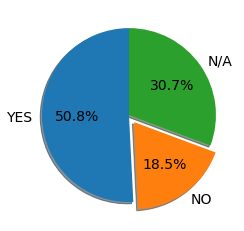

In [11]:

# Visualizing the values of the 3 classes before nlp model
import matplotlib.pyplot as plt
existence= ['YES','NO','N/A'] 
values = [3029,1105,1829] 
import matplotlib.pyplot as plt
 

fig1, ax1 = plt.subplots()
explode = (0, 0.1, 0) 
ax1.pie(values, explode=explode, labels=existence,autopct='%1.1f%%',
        shadow=True, startangle=90,textprops={'fontsize': 14})
 
plt.show()

In [12]:
#count number of nan values in each column
print (df.isnull().sum())

tweet         0
existence     0
confidence    0
dtype: int64


In [13]:
# to ignore jupytr notebook mein warnings!
import warnings
warnings.filterwarnings('ignore')

#Sentiment Analysis

In [14]:
pip install textblob    #needed for sentiment analysis

In [15]:
from textblob import TextBlob

df['sentiment']=df['tweet'].apply(lambda Tweet: TextBlob(Tweet).sentiment.polarity)
pd.options.display.max_colwidth=200
print(df.head())

                                                                                                                    tweet  ... sentiment
0  Global warming report urges governments to act|BRUSSELS, Belgium (AP) - The world faces increased hunger and .. [link]  ...      0.00
1                                                                    Fighting poverty and global warming in Africa [link]  ...      0.00
2                                             Carbon offsets: How a Vatican forest failed to reduce global warming [link]  ...     -0.25
3                                             Carbon offsets: How a Vatican forest failed to reduce global warming [link]  ...     -0.25
4                                                URUGUAY: Tools Needed for Those Most Vulnerable to Climate Change [link]  ...      0.00

[5 rows x 4 columns]


In [16]:
#Finally adding labels 
import numpy as np
conditionList = [
    df['sentiment'] == 0,
    df['sentiment'] > 0,
    df['sentiment'] < 0]
choiceList = ['neutral', 'positive', 'negative']
df['label'] = np.select(conditionList, choiceList, default='no_label')
pd.options.display.max_colwidth=20
df.head()

,tweet,existence,confidence,sentiment,label
0,Global warming r...,Yes,1.0000,0.00,neutral
1,Fighting poverty...,Yes,1.0000,0.00,neutral
2,Carbon offsets: ...,Yes,0.8786,-0.25,negative
3,Carbon offsets: ...,Yes,1.0000,-0.25,negative
4,URUGUAY: Tools N...,Yes,0.8087,0.00,neutral


Splitting the dataset into the Training set and Test set

In [18]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x= df.iloc[:, -5].values  #tweets
y = df.iloc[:, -1].values #sentiment column

#using label encoder to change label values to cat values so that log reg can pass them
from sklearn import preprocessing
from sklearn import utils

labelencoder = preprocessing.LabelEncoder()
y =labelencoder.fit_transform(y)
y

array([1, 1, 0, ..., 2, 1, 1])

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)


#Part 1 : Preprocessing the data

In [20]:
#Preprocessing using BERT 
(x_train, y_train), (x_test, y_test), preproc=text.texts_from_array(x_train=x_train,y_train=y_train,
                                                                    x_test=x_test,y_test=y_test,
                                                class_names=['neutral','positive','negative'],
                                                maxlen=350,max_features=1500,
                                              preprocess_mode='bert')

downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


task: text classification


#Part 2 : Training the model

In [21]:
model = text.text_classifier(name='bert',
                             train_data=(x_train, y_train),
                             preproc=preproc)

learner = ktrain.get_learner(model=model,
                             train_data=(x_train, y_train),
                             val_data=(x_test, y_test),
                             batch_size=6)

Is Multi-Label? False
maxlen is 350
done.


#Part 3 : Fitting the model on the data

In [22]:
learner.fit_onecycle(2e-5, 4)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/4
552/552 [==============================] - 10623s 19s/step - loss: 1.0894 - accuracy: 0.4349 - val_loss: 0.9919 - val_accuracy: 0.4583
Epoch 2/4
552/552 [==============================] - 10714s 19s/step - loss: 0.7611 - accuracy: 0.6819 - val_loss: 0.4980 - val_accuracy: 0.8186
Epoch 3/4
552/552 [==============================] - 10724s 19s/step - loss: 0.2368 - accuracy: 0.9237 - val_loss: 0.4184 - val_accuracy: 0.8682
Epoch 4/4
552/552 [==============================] - 10594s 19s/step - loss: 0.0564 - accuracy: 0.9849 - val_loss: 0.4759 - val_accuracy: 0.8706


#Part 4 : Evaluating the model

In [1]:
learner.validate(val_data=(x_test, y_test), class_names=['neutral','positive','negative' ])            

NameError: ignored

How to Use Our Trained BERT Model
We can call the learner.get_predictor method to obtain a Predictor object capable of making predictions on new raw data.



In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc)

In [ ]:
predictor.get_classes()

['neutral', 'positive', 'negative']

In [ ]:
predictor.predict(x[:10]) 

['positive',
 'positive',
 'neutral',
 'neutral',
 'positive',
 'positive',
 'positive',
 'negative',
 'negative',
 'neutral']

In [ ]:
#getting value counts for df
data['label'].value_counts()

In [ ]:
# Visualizing the values of the 3 classes after nlp model
import matplotlib.pyplot as plt
existence= ['POSITIVE','NEGATIVE','NEUTRAL'] 
data = [0,0,0] 
import matplotlib.pyplot as plt
 

fig1, ax1 = plt.subplots()
explode = (0, 0.1, 0) 
ax1.pie(data, explode=explode, labels=existence,autopct='%1.1f%%',
        shadow=True, startangle=90,textprops={'fontsize': 14})
 
plt.show()

Ashna's code ends here